In [ ]:
# Importar las librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv', skipinitialspace=True)

In [ ]:
# Mostrar las primeras filas del DataFrame
print(df.head())


  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0                        5.0                       1.0   

  Social_Media_Platform  Happiness_Index(1-10)  
0              Facebook                   10.0  
1     

In [ ]:
# Mostrar información técnica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB
None


In [ ]:
# Contar valores nulos por columna
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [ ]:
# Mostrar resumen estadístico de las columnas numéricas
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


#Impacto del tiempo en pantalla sobre la felicidad. 

In [ ]:
# Seleccionar las columnas relevantes para el análisis
#Selección de columnas relevantes para el análisis. 
subset = df[['Daily_Screen_Time(hrs)', 'Happiness_Index(1-10)','Age', 'Gender']]

In [ ]:
# Renombrar columnas para facilitar su uso en el análisis
#Renombramois la columnas seleccionadas para facilitar su manejo. 
subset = subset.rename(columns={
    'Daily_Screen_Time(hrs)': 'ScreenTime', 'Happiness_Index(1-10)': 'HappinessIndex'})

## Rango Intercuartílico (IQR)

El **Rango Intercuartílico (IQR)** es una medida estadística que nos ayuda a entender la dispersión o variabilidad de la mitad central de los datos, ignorando los valores extremos (*outliers*).  
Es fundamental en el análisis exploratorio de datos (EDA).

---

## ¿Cómo funciona?

Imagina que ordenamos todos nuestros datos (por ejemplo, las horas de uso de pantalla) de menor a mayor.  
El IQR se basa en dividir estos datos ordenados en **cuatro partes iguales**, llamadas *cuartiles*:

| Cuartil | Descripción               | % de datos por debajo |
|--------|----------------------------|-------------------------|
| Q1     | Primer Cuartil            | 25%                    |
| Q2     | Mediana (Segundo Cuartil) | 50%                    |
| Q3     | Tercer Cuartil            | 75%                    |

El IQR se calcula como:

[
IQR = Q3 - Q1
]

---

## Interpretación y Uso

El IQR indica qué tan “ancha” es la zona donde se concentra el **50% de las observaciones más típicas**:

- **IQR pequeño:** los datos están muy agrupados cerca de la mediana.  
- **IQR grande:** los datos intermedios están más dispersos.

---

## Detección de Outliers (Valores Atípicos)

Una aplicación muy común del IQR es detectar datos sospechosamente bajos o altos.

Un valor se considera atípico si está:

- **Por debajo del límite inferior:**

\[
Q1 - 1.5 * IQR
\]

- **Por encima del límite superior:**

\[
Q3 + 1.5 * IQR
\]



In [ ]:
# Calcular IQR y detectar outliers en la columna 'ScreenTime'
Q1 = subset['ScreenTime'].quantile(0.25)
Q3 = subset['ScreenTime'].quantile(0.75)

IQR = Q3 - Q1
# Filtramos las filas del DataFrame 'subset' que tienen valores atípicos (outliers)
# en la columna 'ScreenTime' utilizando el método del IQR.

outliers = subset[
    
    # Primera condición:
    # Detecta valores que están MUCHO más abajo de lo normal.
    # Si ScreenTime es menor que (Q1 - 1.5 * IQR), se considera un outlier inferior.
    (subset['ScreenTime'] < (Q1 - 1.5 * IQR)) 
    
    
    |  # El operador OR: si se cumple una de las dos condiciones, la fila se marca como outlier.
    
    
    # Segunda condición:
    # Detecta valores que están MUCHO más arriba de lo normal.
    # Si ScreenTime supera (Q3 + 1.5 * IQR), se considera un outlier superior.
    (subset['ScreenTime'] > (Q3 + 1.5 * IQR))
]

In [ ]:
# Calcular y mostrar los límites inferior y superior basados en IQR
valor_inferior = (Q1 - 1.5 * IQR).__round__(2)
valor_superior = (Q3 + 1.5 * IQR).__round__(2)

print(f'Valor real del IQR: {(IQR).__round__(2)}')
print(f'Valor real de la condición inferior: {valor_inferior}')
print(f'Valor real de la condición superior: {valor_superior}')

Valor real del IQR: 2.4
Valor real de la condición inferior: 0.7
Valor real de la condición superior: 10.3


In [ ]:
# Mostrar filas identificadas como outliers y tomar el primer outlier superior
print(f'Outliers based on Screen Time:\n{outliers}')
outlier_sup = outliers['ScreenTime'].iloc[0]



Outliers based on Screen Time:
     ScreenTime  HappinessIndex  Age  Gender
248        10.8             4.0   46  Female
325        10.8             5.0   27    Male


In [ ]:
# Calcular la mediana de ScreenTime
median_screen_time = subset['ScreenTime'].median()

Este resultado indica que existen dos valores atipicos en el análisis: 
- En la fila 248,
- En la fila 325. 

Si bien estos dos valores no son muy diferentes al resto (cantidad de horas de pantalla) se pueden identificar como extremos. 

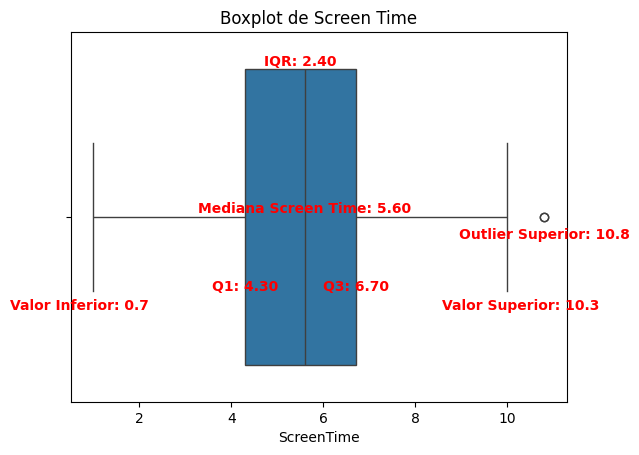

In [ ]:
# Dibujar boxplot de ScreenTime y anotar estadísticas clave
sns.boxplot(data=subset, x='ScreenTime')
plt.title('Boxplot de Screen Time')


#Función para anotar datos en el gráfico
def anotar_valor(x_coord, text, offset_y=-0.1):
    plt.text(
        x_coord, 
        offset_y, 
        text, 
        horizontalalignment='center',
        color='red',
        weight='bold',
        fontsize=10
    )
    
anotar_valor(Q1, f"Q1: {Q1:.2f}", 0.2)
anotar_valor(Q3, f"Q3: {Q3:.2f}", 0.2)
anotar_valor(Q1 + IQR/2, f"IQR: {IQR:.2f}", -0.41)
anotar_valor(median_screen_time, f'Mediana Screen Time: {median_screen_time:.2f}', -0.01)
anotar_valor(valor_inferior, f'Valor Inferior: {valor_inferior}', 0.25)
anotar_valor(valor_superior, f'Valor Superior: {valor_superior}', 0.25)
anotar_valor(outlier_sup, f'Outlier Superior: {outlier_sup}', 0.06)

plt.show()


En base al resultado obtenido podemos observar lo siguiente:
- Límite inferior: 0.7. Cualquier valor < 0.7 horas es considerado un outlier inferior. 
- Límite superior: 10.3. Cualquier valor > 10.3 será considerado un outlier superior. 

Esto implica: 
- Usuarios que reportan menos de 0.7 horas diarias (≈ 40 minutos) serían considerados átipicos. 
- Usuarios que reportan mas de 10.3 horas diarias  serían considerados átipicos. 


Outliers encontrados.
Como se detalla en el análisis de outliers, se encontraron dos valores átipicos: 10.8 tanto para hombres y muejeres - Ambos valores están por encima del límite superior, por lo tanto matemáticamente son átipicos. 

¿Son outliers imposibles o simplemente poco frecuentes? 
- 10.8 horas de pantalla al día si es posible en la vida real. 
- Personas que pasan 10-12 horas frente a pantallas no son imposibles; son infrecuentes. 

Por lo tanto, estos outliers son:
- Atípicos desde lka estadística,
- Realista desde la perspectiva humana. 

Para abordar estos valores atípicos se determinó mantener los valores, ya que consideramos que las personas con alto 'screen time' son parte fundamental del fenomeno a analizar. 




#Calculamos la correclación entre Screen Time y Happiness. 
La corrrelación de Pearson es una medida que cuantifica qué tan relacionado está un conjunto de variables entre sí, es decir, si cambian juntas y en qué dirección. 

In [ ]:
# Calcular la matriz de correlación entre ScreenTime y HappinessIndex
subset[['ScreenTime', 'HappinessIndex']].corr().__round__(2)

,ScreenTime,HappinessIndex
ScreenTime,1.00,-0.71
HappinessIndex,-0.71,1.00


La correlación:
- Va de -1 a 1,
- Valores cercanos a 1 -> relación positiva fuerte (si aumenta 'ScreenTime, también aumenta 'HappinessIndex'), 
- Valores cercanos a -1 -> relación negativa fuerte (si aumenta 'ScreenTime, 'HappinessIndex' baja),
- Valores cercanos a 0 -> no hay relación lineal. 

Análisis del output. 
Podemos observar una correlación negativa fuerte (r = -0.71) entre 'ScreenTime' y 'HappinessIndex'. Esto implica que los usuarios con mayor exposición díaria a pantallas tienen  a reportar menores niveles de felicidad. No se puede concluir causalidad, pero la relación estadística es clara. 

Graficación de la correlación a trabes de un gráfico del tipo 'scatter'. 
Donde: 
- np.polyfit(x,y,1): sirve para ajustar un polinomio a un conjunto de puntos (calcula la mejor recta que se adapte a los puntos). 
x: valores independientes,
y: valores dependientes, 
1: grado del polinomio - De la forma y = mx + b (m = pendiente, b = intercepto - Cálcula estos dos números mediante el método estadísitco 'mínimos cuadrados').

- np.poly1d(x): convierte los coeficientes, obtenidos en el paso anterior, en una función (Crea la función matemática de la recta). 
Si los coeficientes son: [m, x], poly1d_fn(x) es equivalente a 'm-x + b'. 


- plt.plot(x, poly1d_fn(x)): Dibuja la línea (Dibuja la recta en el gráfico). 
Esta parte toma los valores de 'x', calcula los valores correspondientes de la recta con poly1d_fn(x) y dibuja la línea conectando esos puntos. 


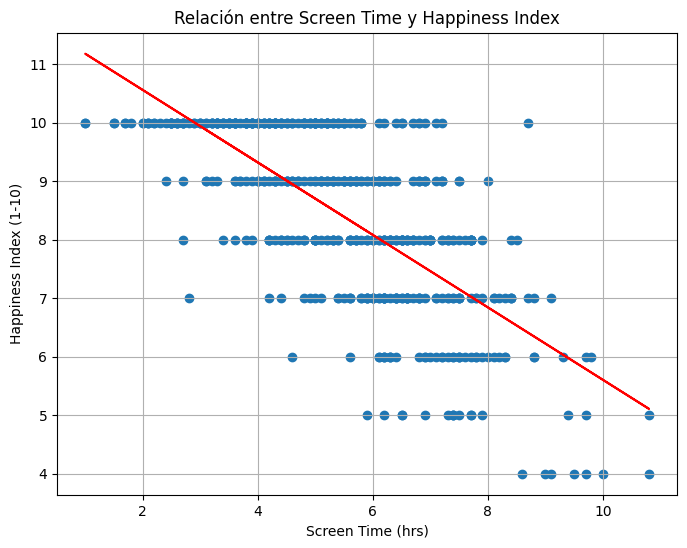

In [15]:
# Graficar dispersión entre ScreenTime y HappinessIndex y ajustar línea de regresión

#Variables
screen_time = subset['ScreenTime']
happiness_index = subset['HappinessIndex']

#Creación de la figura. 
plt.figure(figsize=(8,6))
#Scatter plot
plt.scatter(screen_time, happiness_index)

#Crear la línea de regresión
coef = np.polyfit(screen_time,happiness_index,1) #Ajuste lineal
poly1d_fn = np.poly1d(coef) #Modelo de la recta
plt.plot(screen_time, poly1d_fn(screen_time), color='red') #Dibujar la línea de regresión

#Etiuetas y título
plt.title('Relación entre Screen Time y Happiness Index')
plt.xlabel('Screen Time (hrs)')
plt.ylabel('Happiness Index (1-10)')
plt.grid()
plt.show()



Conclusión del gráfico.
El gráfico de dispersión muestra que, a medida que aumentan las horas de uso de pantalla, el índice de felicidad tiende a disminuir. Esto se observa porque los puntos forman una tendencia descendente y la línea roja de regresión también baja de izquierda a derecha. La correlación calculada previamente (-0.71) coincide visualmente con lo que vemos: es una relación negativa fuerte.

En términos simples, las personas que usan más tiempo la pantalla suelen tener niveles más bajos de felicidad, mientras que quienes usan menos tiempo tienden a mostrar valores de felicidad más altos. Aunque no todos los puntos siguen exactamente la línea, la mayoría acompaña esa tendencia, lo que indica que la relación es consistente.

En el análisis subsiguiente, procederemos a agrupar el tiempo de pantalla en tres categorías discretas diferentes: 
- Bajo, 
- Medio, 
- Alto. 
De esta manera podremos calcular el promedio de 'felicidad' en base a las horas de exposición díarias de pantalla. 

In [ ]:
# Agrupar ScreenTime en categorías discretas (Bajo/Medio/Alto)
#Agreupamos el tiempo en pantalla en categrías discretas para comparar promedios.
subset['ScreenGroup'] = pd.cut(subset['ScreenTime'],
                              bins = [0, 3, 6, 10],
                              labels=['Bajo', 'Medio', 'Alto']
                              )


In [17]:
# Calcular promedio de HappinessIndex por cada grupo de ScreenTime
subset.groupby('ScreenGroup')['HappinessIndex'].mean().round(2)

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_16080\349618276.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset.groupby('ScreenGroup')['HappinessIndex'].mean().round(2)


ScreenGroup
Bajo     9.82
Medio    9.04
Alto     7.28
Name: HappinessIndex, dtype: float64

Conclusión del análisis. 
Los valores muestran una relación clara y consistente:
- A medida que aumenta el tiempo de pantalla, disminuye el índice de felicidad. 
- Quienes usan pantallas pocas horas, tienen la mayor felicidad promedio. 
- Los usuarios de uso medio presentan una leve baja en los niveles de felicidad. 
- Los usuarios de uso alto tienen el nivel de felicidad mas bajo del grupo. 

La diferencia es bastante marcada especialmente entre bajo y alto: 
- 9.82 vs 7.28 → una caída de aproximadamente 2.5 puntos, lo cual es una diferencia grande en una escala de 1 a 10.